In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress

# Set global pandas and matplotlib settings
pd.set_option('display.max_columns', None)
plt.rcParams.update({
    'figure.figsize': (15, 15),
    'mathtext.fontset': 'cm',
    'axes.titlepad': 20,
    'axes.titlesize': 40,
    'font.size': 40,
    'font.family': 'arial'
})

In [22]:
def plot_linear_regression(ax, x, y, min_max, color='blue', alpha=1):
    """ Plots linear regression line with correlation label. """
    x_range = np.linspace(min_max[0], min_max[1], 1000)
    slope, intercept, r_value = linregress(x, y)[:3]
    ax.plot(x_range, intercept + slope * x_range, linewidth=3, color=color, label=f'r={r_value:.3f}', alpha=alpha)

def get_significance_stars(p_value):
    """ Returns significance stars based on p-value. """
    if p_value <= 0.001:
        return '***'
    elif p_value <= 0.01:
        return '**'
    elif p_value <= 0.05:
        return '*'
    return ''

def style_axes(ax, width=3):
    """ Applies styling to axes. """
    ax.spines['left'].set_linewidth(width)
    ax.spines['bottom'].set_linewidth(width)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.tick_params('both', length=12, width=width)

def define_groups(df, column_name):
    """ Defines groups based on a specified column. """
    df['group_split_2'] = np.where(df[column_name] <= 1, 1, np.where(df[column_name] >= 9, 2, np.nan))
    return df

def clean_df(df):
    """ Cleans dataframe by removing rows with infinite or NaN values in 'alpha_empirical' column. """
    return df[df['alpha_empirical'].replace([np.inf, -np.inf], np.nan).notna()]

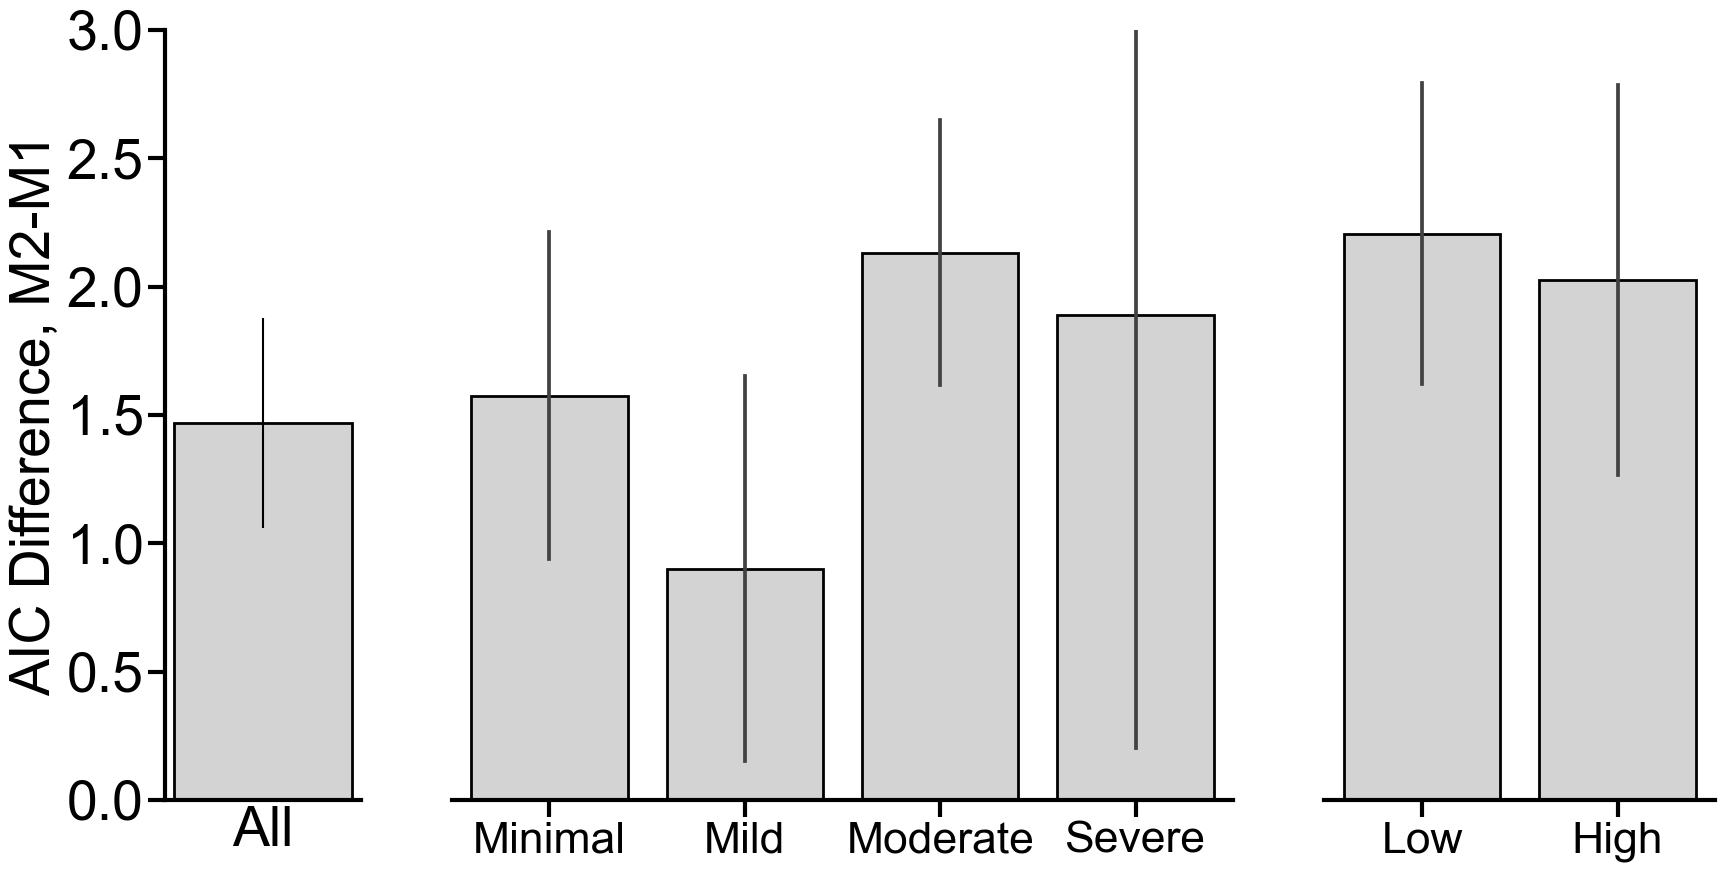

In [23]:
# Load data
df_pars = pd.read_csv('../results/variable_fb_fitted_model_params.csv')  

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(20, 10), gridspec_kw={'width_ratios': [0.5, 2, 1]})
[style_axes(ax) for ax in axes]
[ax.set_ylim([0, 3]) for ax in axes]

# Bar plot for AIC differences
axes[0].bar([1], [df_pars['aic_diff'].mean()], yerr=[df_pars['aic_diff'].sem()], 
            edgecolor='black', color='lightgrey', linewidth=2)
axes[0].set_xlabel('All')
axes[0].set_xticks([])
axes[0].set_ylabel(r'AIC Difference, M2-M1') 

# Seaborn bar plots
sns.barplot(x='bdi_group_num', y='aic_diff', errorbar='se', data=df_pars, ax=axes[1], 
            edgecolor='black', color='lightgrey', linewidth=2)
axes[1].set_xticklabels(['Minimal', 'Mild', 'Moderate', 'Severe'], fontsize=32)

sns.barplot(x='group_split_2', y='aic_diff', errorbar='se', data=df_pars, ax=axes[2], 
            edgecolor='black', color='lightgrey', linewidth=2)
axes[2].set_xticklabels(['Low', 'High'], fontsize=32)

# Adjusting secondary axes
for ax in axes[1:]:
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.spines['left'].set_visible(False)
    ax.set_yticks([])

plt.show()